In [40]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

## Computer Excercise 1

In [2]:
def G(row_s, Temp):
    return np.exp((1/Temp) * np.dot(row_s[0:-1], row_s[1:]))

## Computer Excercise 2

In [3]:
def F(row_s, row_t, Temp):
    return np.exp((1/Temp) * np.dot(row_s, row_t))

## Computer Excercise 3

In [4]:
temps = {1:0, 1.5:0, 2:0}
x_values = {1, -1}
for temp in temps:
    for x_1_1 in x_values:
        for x_1_2 in x_values:
            for x_2_1 in x_values:
                for x_2_2 in x_values:
                    grid = [[x_1_1,x_1_2],
                            [x_2_1,x_2_2]]
                    temps[temp] += G(grid[0], temp)*G(grid[1], temp)*F(grid[0],grid[1], temp)

In [5]:
temps

{1: 121.23293134406595, 1.5: 40.922799092745386, 2: 27.048782764334526}

## Computer Excercise 4

In [6]:
temps = {1:0, 1.5:0, 2:0}
x_values = {1, -1}
for temp in temps:
    for x_1_1 in x_values:
        for x_1_2 in x_values:
            for x_1_3 in x_values:
                for x_2_1 in x_values:
                    for x_2_2 in x_values:
                        for x_2_3 in x_values:
                            for x_3_1 in x_values:
                                for x_3_2 in x_values:
                                    for x_3_3 in x_values:
                                        grid = [[x_1_1,x_1_2,x_1_3],
                                                [x_2_1,x_2_2,x_2_3],
                                                [x_3_1,x_3_2,x_3_3]]
                                        temps[temp] += G(grid[0], temp)*G(grid[1], temp)*G(grid[2], temp)*F(grid[0],grid[1], temp)*F(grid[1],grid[2], temp)

In [7]:
temps

{1: 365645.7491357704, 1.5: 10565.421983514265, 2: 2674.518123060087}

## Computer Excercise 5

In [8]:
def y2row(y,width=8):
    """
    y: an integer in (0,...,(2**width)-1)
    """
    if not 0<=y<=(2**width)-1:
        raise ValueError(y)
    my_str=np.binary_repr(y,width=width)
    my_list = list(map(int,my_str))
    my_array = np.asarray(my_list)
    my_array[my_array==0]=-1
    row=my_array
    return row

In [9]:
temps = {1:0, 1.5:0, 2:0}
y_values = {0,1,2,3}
for temp in temps:
    for y_1 in y_values:
        for y_2 in y_values:
            grid = [y2row(y_1, 2),
                    y2row(y_2, 2)]
            temps[temp] += G(grid[0], temp)*G(grid[1], temp)*F(grid[0],grid[1], temp)

In [10]:
temps

{1: 121.23293134406595, 1.5: 40.922799092745386, 2: 27.048782764334526}

## Computer Excercise 6

In [11]:
temps = {1:0, 1.5:0, 2:0}
y_values = {0,1,2,3,4,5,6,7}
for temp in temps:
    for y_1 in y_values:
        for y_2 in y_values:
            for y_3 in y_values:
                grid = [y2row(y_1, 3),
                        y2row(y_2, 3),
                        y2row(y_3, 3)]
                temps[temp] += G(grid[0], temp)*G(grid[1], temp)*G(grid[2], temp)*F(grid[0],grid[1], temp)*F(grid[1],grid[2], temp)

In [12]:
temps

{1: 365645.7491357704, 1.5: 10565.421983514265, 2: 2674.518123060087}

## Computer Excercise 7

In [62]:
temps = [1, 1.5, 2]
def forward_pass(temp, width=8):
    y_values = 2 ** width
    Ts = [np.ones(y_values)]
    for k in range(1, width):
        Ts.append(np.zeros(y_values))
        for i in range(y_values):
            for j in range(y_values):
                Ts[k][i] += Ts[k-1][j]*G(y2row(j, width), temp)*F(y2row(j, width), y2row(i, width), temp)
    
    # for last Ts[k]: k=width
    z_temp = 0
    for j in range(y_values):
        z_temp += Ts[width-1][j]*G(y2row(j, width), temp)
    
    return Ts, z_temp

(2X2 lattice)

In [63]:
Ts, z_temp = forward_pass(1,2)

In [64]:
Ts[1]

array([21.18917525,  8.20463255,  8.20463255, 21.18917525])

In [65]:
z_temp

121.23293134406596

(3X3 lattice)

In [66]:
Ts, z_temp = forward_pass(1, 3)

In [67]:
Ts[1]

array([155.37102759,  46.44297052,  31.70116107,  46.44297052,
        46.44297052,  31.70116107,  46.44297052, 155.37102759])

In [68]:
Ts[2]

array([23416.16435187,  4634.76802124,  3916.10003703,  4634.76802124,
        4634.76802124,  3916.10003703,  4634.76802124, 23416.16435187])

In [69]:
z_temp

365645.7491357699

In [70]:
def calc_ps(Ts, z_temp, temp, width=8):
    y_values = 2 ** width
    Ps = [0]
    for k in range(1, width):
        Ps.append(np.zeros((y_values,y_values)))
        for i in range(y_values):
            for j in range(y_values):
                Ps[k][i][j] = (Ts[k-1][i]*G(y2row(i,width),temp)*F(y2row(i,width),y2row(j,width),temp)) / Ts[k][j]
    
    # for last Ps[k]: k=width
    P_last =  np.zeros(y_values)
    for i in range(y_values):
        P_last[i] = Ts[width-1][i]*G(y2row(i,width),temp) / z_temp
    
    return Ps, P_last

In [71]:
def get_sample(Ps, P_last, width=8):
    y_values = 2 ** width
    take_from = np.asarray(range(y_values))
    sample = np.zeros((width, width))
    last_choice = np.random.choice(take_from, p=P_last)
    sample[width-1] = y2row(last_choice, width)
    
    for row in range(width-2, -1, -1):
        curr_choice = np.random.choice(take_from, p=Ps[row+1][:,last_choice])
        sample[row] = y2row(curr_choice, width)
        last_choice = curr_choice
    
    return sample

In [72]:
def sampler(temp, width=8):
    Ts, z_temp = forward_pass(temp)
    Ps, P_last = calc_ps(Ts, z_temp, temp)
    return lambda : get_sample(Ps, P_last, width)

In [24]:
sampler1=sampler(1)
sampler2=sampler(1.5)
sampler3=sampler(2)

In [73]:
def run_sampler(sampler, n):
    samples = []
    for i in range(n):
        samples.append(sampler())
    
    return samples

In [74]:
S = []
S.append(run_sampler(sampler1, 10))
S.append(run_sampler(sampler2, 10))
S.append(run_sampler(sampler3, 10))

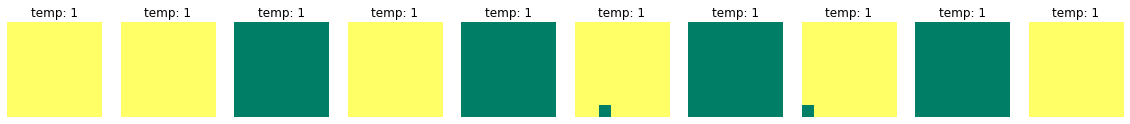

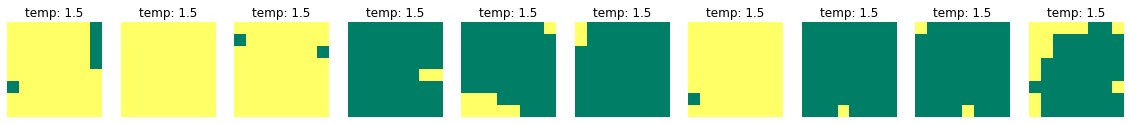

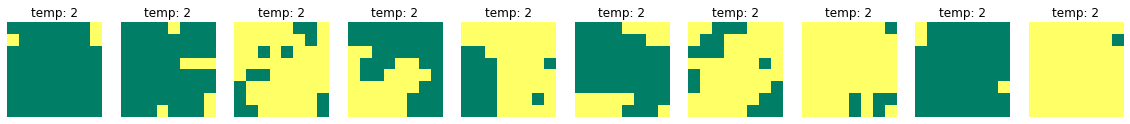

In [75]:
for i in range(len(S)):
    fig, axs = plt.subplots(1, 10, figsize=(20,20))
    for j in range(len(S[i])):
        axs[j].imshow(S[i][j], interpolation="None", cmap='summer', vmin=-1, vmax=+1)
        axs[j].axis("off")
        axs[j].set_title(f"temp: {temps[i]}")

## Problem 1
We would like to calculate the following calculation of the probability:

\begin{align}
p(x)=\frac{1}{Z_{Temp}}exp(\frac{1}{Temp}\sum_{s∼t}x_sx_t)
=\frac{1}{Z_{Temp}}exp(\frac{1}{2}\sum_{s∼t}x_sx_t)
\end{align}

<ins>For these two code commands:</ins><br>
python2 -c "print [1/Temp for Temp in [1,1.5,2]]" <br>
python3 -c "print ([1/Temp for Temp in [1,1.5,2]])" <br>


<ins>The output is:</ins><br>
[1, 0.6666666666666666, 0]<br>
[1.0, 0.6666666666666666, 0.5]<br>


Meaning, calculating int division in python2 remains an int, but python3 casts to float.
Therefore, in python2, the frustrated student encountered truncation when dividing 1/2.

Hence:
\begin{align}
p(x)=\frac{1}{Z_{Temp}}exp(0)=\frac{1}{Z_{Temp}}
\end{align}

With:
\begin{align}
Z_{Temp}=\sum_x{exp(\frac{1}{Temp}\sum_{s∼t}x_sx_t)}=\sum_x{exp(0)}=\sum_x{1}=size(x)
\end{align}

And now:
\begin{align}
p(x)=\frac{1}{size(x)}
\end{align}

which means, the student sampled from the uniform distribution over binary images, and gained completely random samples (with no structure whatsoever).

## Computer Excercise 8

In [61]:
temps = [1, 1.5, 2]

S = []
S.append(run_sampler(sampler1, 10000))
S.append(run_sampler(sampler2, 10000))
S.append(run_sampler(sampler3, 10000))

for i in range(len(S)):
    E_1_2 = 0
    E_1_8 = 0
    for x in S[i]:
        E_1_2 += x[0,0]*x[1,1]
        E_1_8 += x[0,0]*x[7,7]
    E_1_2 /= len(S[i])
    E_1_8 /= len(S[i])
    print(f"Temp = {temps[i]}")
    display(Latex("$\qquad\hat{E}_{Temp}(X_{(1,1)}X_{(2,2)})$"+f" = {E_1_2}"))
    display(Latex("$\qquad\hat{E}_{Temp}(X_{(1,1)}X_{(8,8)})$"+f" = {E_1_8}"))

Temp = 1


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Temp = 1.5


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Temp = 2


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Problem 2

We can understand from $\hat{E}_{Temp}(X_{(1,1)}X_{(2,2)})$ and $\hat{E}_{Temp}(X_{(1,1)}X_{(8,8)})$ for each of the temperatures values the following:
 - In the case of a lower temperature (=1), the probabilities to obtain two near pixels with the same value and even two far pixels with the same value is likely high.
 - As we raise the temperature (=1.5), we notice that the overall probabilities to obtain two same value pixels (with the same distance as in the lower temperature) decreases.<br>But still, closer pixels have better chance to get the same value than distant pixels.
 - with high temperature (=2) we get that even for two close pixels (with distance 2) the probability of gaining the same value is almost independent of each other (probability = 0.5).<br>For two distant pixels, their probability of getting different values is very high (probability = 1 - 0.1 = 0.9).
 
This behaviour results from the Ising's model property that tends to bind close pixels together with the same value (as it tries to shorten the length of the boundaries separating the values).

## Computer Excercise 9